In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#directory = "/home/jtso3/ghassan/ProMDLM/generated_sequences"
#
#names = ["generated_sequences_fulldiff", "generated_sequences_increment", "generated_sequences_fulldiff", "generated_sequences_two_stage", "generated_sequences_progen", "lysozyme_100_test_set_final"]
#
#for name in names:
#    blastn_file = f"{directory}/{name}_results_blastn.csv"
#    entropy_file = f"{directory}/{name}_results_entropy.csv"
#    ppl_file = f"{directory}/{name}_w_pseudo_perplexity.csv"
#    full_file = f"{directory}/{name}_results_full.csv"
#
#    # Read the files as dataframes
#    blastn_df = pd.read_csv(blastn_file)
#    entropy_df = pd.read_csv(entropy_file)["entropy"]
#    ppl_df = pd.read_csv(ppl_file)["pseudo_perplexity"]
#
#    # Combine their columns
#    combined_df = blastn_df.join(entropy_df, how="left")
#    combined_df = combined_df.join(ppl_df, how="left")
#    # Write the combined dataframe to full_file
#    combined_df.to_csv(full_file, index=False)

/tmp/ipykernel_1420723/3839424061.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1420723/3839424061.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1420723/3839424061.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)


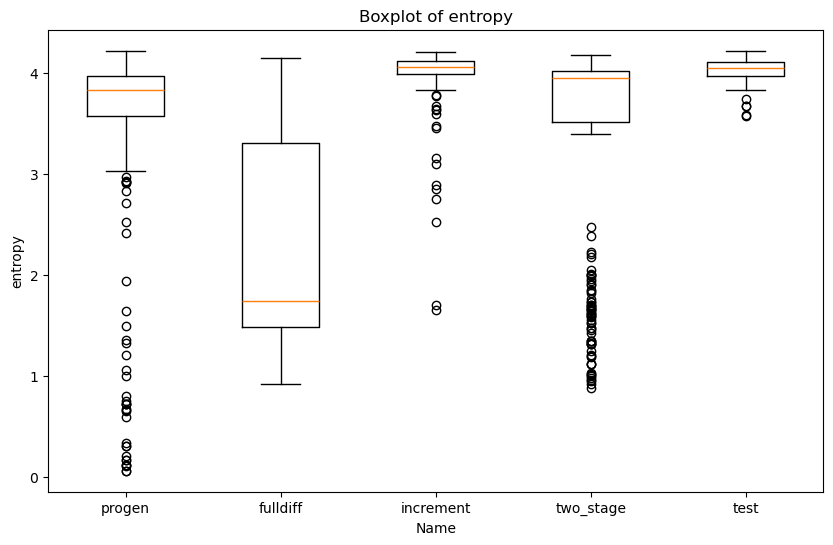

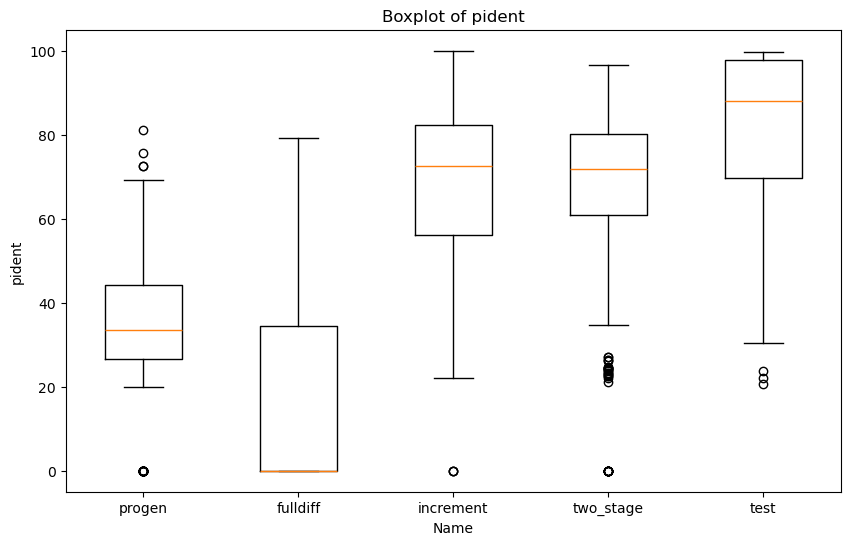

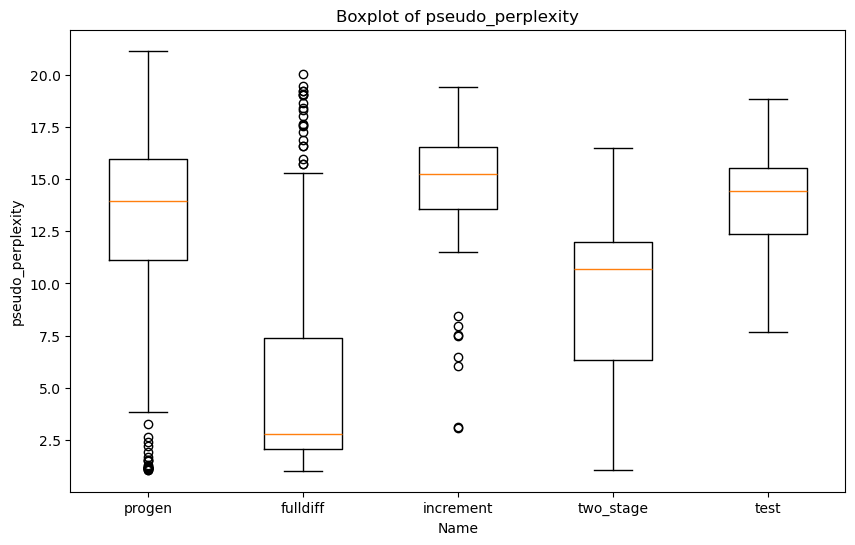

In [28]:
full_files = ["/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_progen_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_fulldiff_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_increment_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_two_stage_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/lysozyme_100_test_set_final_results_full.csv"]

names = ["progen","fulldiff", "increment", "two_stage", "test"]

def boxplot_of_column(full_files, column_name, names, output_path):
    """
    Create a boxplot of the specified column from the full files.
    """
    data = []
    for path in full_files:
        df = pd.read_csv(path)
        data.append(df[column_name])
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=names)
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel('Name')
    plt.ylabel(column_name)
    plt.savefig(output_path)

boxplot_of_column(full_files, "entropy", names, "imgs/entropy_boxplot.png")
boxplot_of_column(full_files, "pident", names, "imgs/diversity_boxplot_before_filtering.png")
boxplot_of_column(full_files, "pseudo_perplexity", names, "imgs/perplexity_boxplot_before_filtering.png")


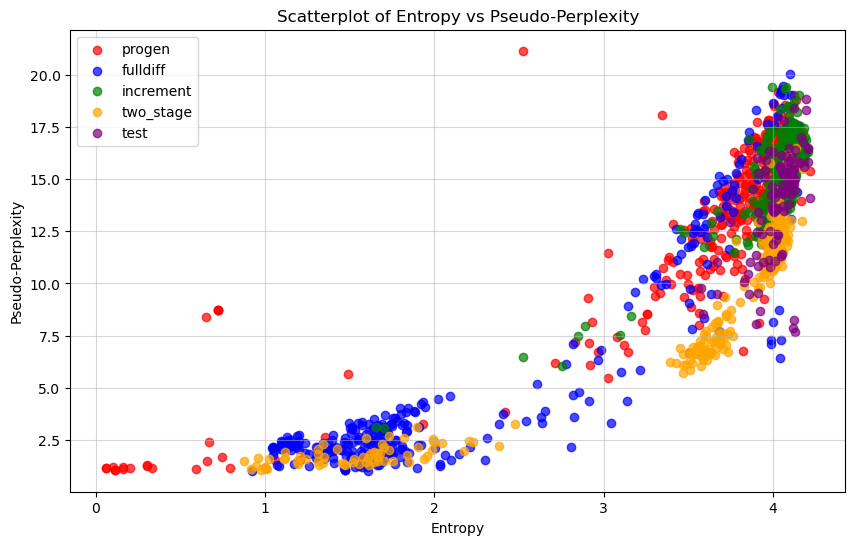

In [29]:
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each dataset

plt.figure(figsize=(10, 6))
for i, path in enumerate(full_files):
    df = pd.read_csv(path)
    plt.scatter(df['entropy'], df['pseudo_perplexity'], color=colors[i], label=names[i], alpha=0.7)

plt.title('Scatterplot of Entropy vs Pseudo-Perplexity')
plt.xlabel('Entropy')
plt.ylabel('Pseudo-Perplexity')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("imgs/scatterplot_entropy_vs_pseudo_perplexity_before_filtering.png")

In [30]:
filtered_files =[]
percent_passed = []
for path in full_files:
    # Load the dataframe from the CSV file
    df = pd.read_csv(path)
    
    # Filter out rows with entropy lower than 2.5
    filtered_df = df[df["entropy"] >= 2.5]
    # Filter out rows where the sequence length is shorter than 50
    filtered_df = filtered_df[filtered_df["sequence"].str.len() >= 50]
    
    # Print the number of lines left
    print(f"{path}: {len(filtered_df)} lines left after filtering.")
    # Calculate the percentage of sequences that passed the filter
    percent_passed.append(len(filtered_df) / len(df) * 100)
    
    # Save the filtered dataframe to a new CSV file
    filtered_path = path.replace(".csv", "_filtered.csv")
    filtered_df.to_csv(filtered_path, index=False)
    filtered_files.append(filtered_path)

/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_progen_results_full.csv: 268 lines left after filtering.
/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_fulldiff_results_full.csv: 98 lines left after filtering.
/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_increment_results_full.csv: 298 lines left after filtering.
/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_two_stage_results_full.csv: 235 lines left after filtering.
/home/jtso3/ghassan/ProMDLM/generated_sequences/lysozyme_100_test_set_final_results_full.csv: 100 lines left after filtering.


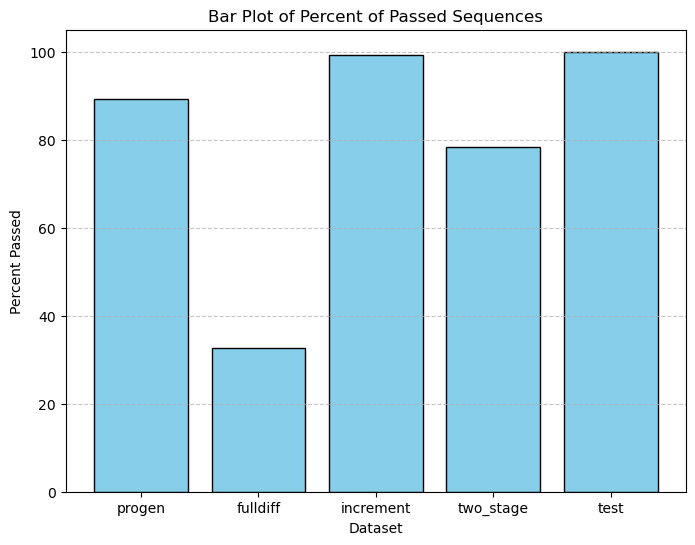

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(names, percent_passed, color='skyblue', edgecolor='black')
plt.title('Bar Plot of Percent of Passed Sequences')
plt.xlabel('Dataset')
plt.ylabel('Percent Passed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imgs/percent_passed.png")

/tmp/ipykernel_1420723/3839424061.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1420723/3839424061.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)


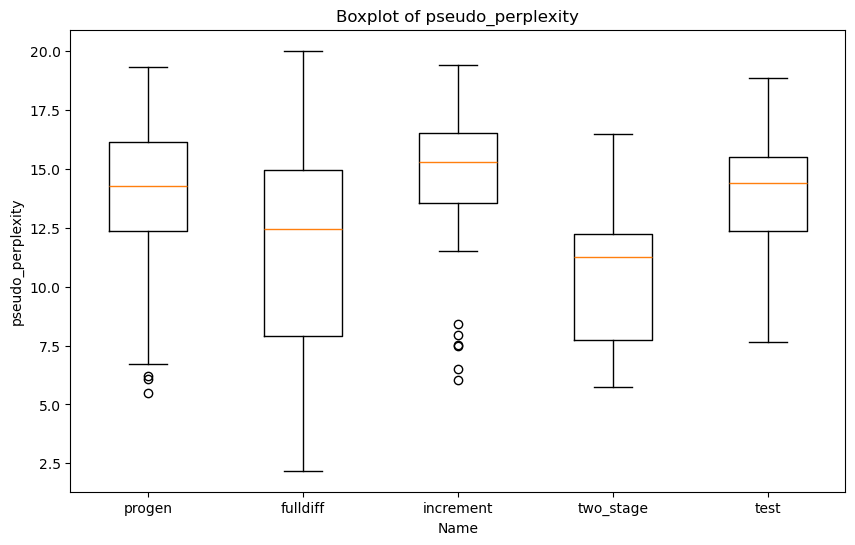

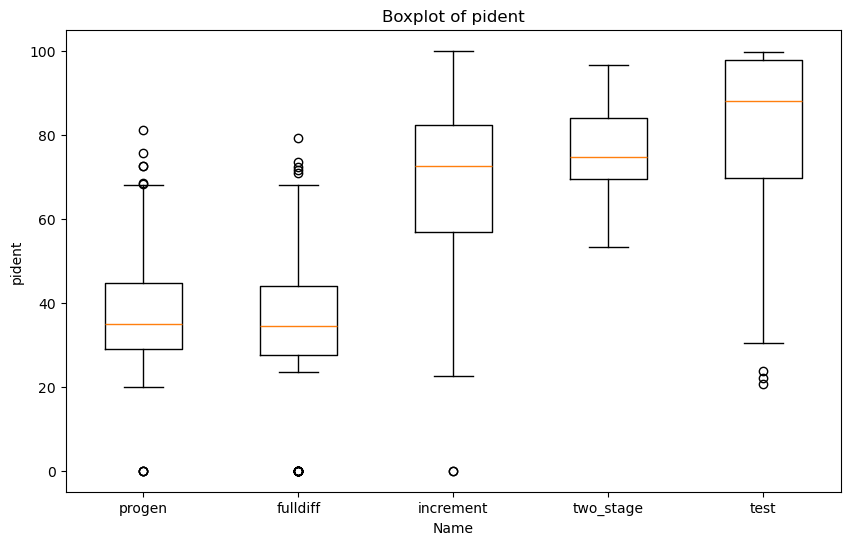

In [32]:
boxplot_of_column(filtered_files, "pseudo_perplexity", names, "imgs/perplexity_boxplot_after_filtering.png")
boxplot_of_column(filtered_files, "pident", names, "imgs/diversity_boxplot_after_filtering.png")

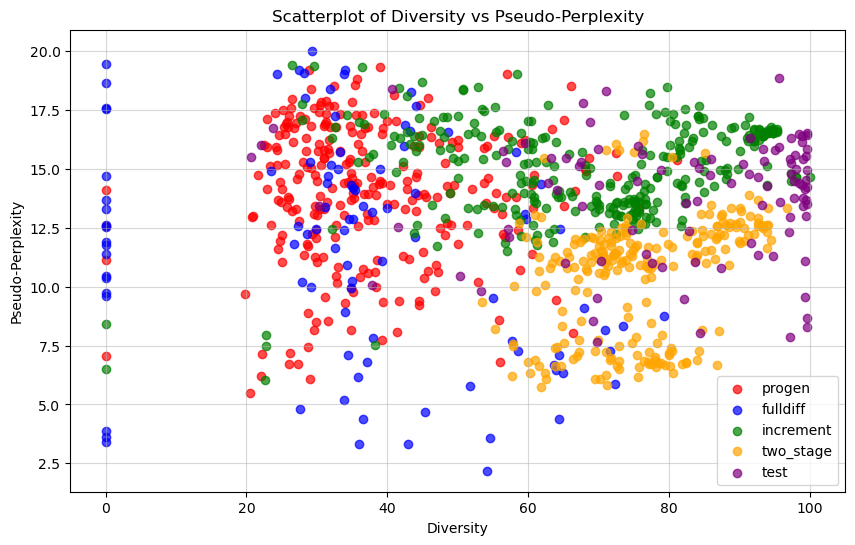

In [33]:
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each dataset

plt.figure(figsize=(10, 6))
for i, path in enumerate(filtered_files):
    df = pd.read_csv(path)
    plt.scatter(df['pident'], df['pseudo_perplexity'], color=colors[i], label=names[i], alpha=0.7)

plt.title('Scatterplot of Diversity vs Pseudo-Perplexity')
plt.xlabel('Diversity')
plt.ylabel('Pseudo-Perplexity')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("imgs/scatterplot_diversity_vs_pseudo_perplexity.png")